# Coauthors sequence in Astrophysics

In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
data_path = os.getenv('DATA_PATH')
result_path = os.getenv('RESULT_PATH')
root = os.getenv('ROOT')

os.chdir(root)
os.getcwd()

'/disks/qnap3/users/23-miura/coauth-interest'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random

from scipy.stats import expon
from scipy.stats import pareto

In [3]:
year_df = pd.read_pickle(data_path + "paper_detail/year.pickle")
print(year_df.head())

eid
229021    1997
266363    1998
229022    1982
229023    1989
266364    1998
Name: year, dtype: int64


In [4]:
counts = year_df.value_counts(normalize=True).sort_index().cumsum()
counts = counts.sort_index(ascending=False)
counts

2022    1.000000
2021    1.000000
2020    0.950966
2019    0.905637
2018    0.862085
2017    0.820509
2016    0.780593
2015    0.741887
2014    0.704471
2013    0.667178
2012    0.630400
2011    0.595216
2010    0.561784
2009    0.530375
2008    0.500543
2007    0.472242
2006    0.445214
2005    0.419489
2004    0.395056
2003    0.373642
2002    0.353694
2001    0.334827
2000    0.316833
1999    0.300226
1998    0.284473
1997    0.268819
1996    0.253361
1995    0.238254
1994    0.224933
1993    0.212022
1992    0.199567
1991    0.187794
1990    0.176015
1989    0.164295
1988    0.153191
1987    0.142715
1986    0.132556
1985    0.122472
1984    0.112199
1983    0.102105
1982    0.092562
1981    0.083313
1980    0.074610
1979    0.066283
1978    0.058116
1977    0.050406
1976    0.043081
1975    0.036045
1974    0.029027
1973    0.022047
1972    0.015565
1971    0.010230
1970    0.005029
Name: year, dtype: float64

In [7]:
# Guimera 2006
p=0.76
q=0.82
m=3
year=[]

C_HIS = {0:{1,2},1:{0,2},2:{0,1}}
INC = {0,1,2}
coauth = []

def step(m):
  max_id = len(INC)
  id = set()
  inc_his = [] # team of previously selected agent
  
  while len(id)<m:
    # incumbents
    if random.random()<p:
      if random.random()<q and len(inc_his)!=0:
        choice =random.choice(list(inc_his))
      else:
        choice =random.choice(list(INC))
      id.add(choice)
      inc_his = C_HIS[choice]
    # newcomer
    else:
      inc_his = []
      id.add(max_id)# ID of the newcomer
      max_id += 1
  
  for i in id:
    if C_HIS.get(i)!=None:
      C_HIS[i].update(id - {i})
    else:
      C_HIS.update([(i,id - {i})])
  INC.update(id)
  return id

for i in range(30552):
  coauth.append(step(m))
  index = counts[counts<(i/30552)].index
  if len(index)>0:
    year.append(index[0])
  else:
    year.append(1969)

(array([ 154.,  159.,  163.,  198.,  213.,  215.,  215.,  223.,  236.,
         250.,  254.,  266.,  282.,  292.,  308.,  314.,  308.,  311.,
         320.,  339.,  358.,  360.,  360.,  380.,  395.,  407.,  461.,
         472.,  479.,  481.,  507.,  550.,  577.,  609.,  654.,  747.,
         786.,  825.,  865.,  912.,  959., 1022., 1074., 1124., 1139.,
        1144., 1182., 1220., 1270., 1331., 1384., 1498.]),
 array([1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
        1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
        1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
        1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
        2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
        2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.]),
 <BarContainer object of 52 artists>)

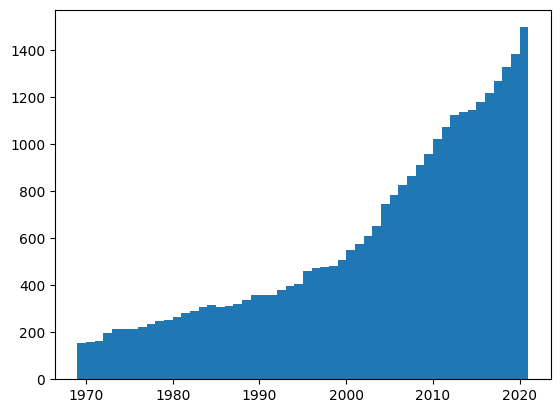

In [8]:
year[-1]
len(set(year))
plt.hist(year,bins=[i for i in range(1969,2022)])

In [9]:
temp = pd.DataFrame(coauth).rename_axis("eid")

def combine_columns(row):
    return row.values.tolist()

# author_df = temp.iterrows.values.tolist()
author_df = pd.DataFrame(temp.apply(combine_columns, axis=1).rename("authid"))
author_df = author_df.assign(year=year)
author_df

,authid,year
eid,,
0,"[0, 1, 2]",1969
1,"[0, 1, 2]",1969
2,"[2, 3, 4]",1969
3,"[2, 3, 4]",1969
4,"[0, 1, 3]",1969
...,...,...
30547,"[2339, 13414, 534]",2020
30548,"[7999, 16126, 16127]",2020
30549,"[22383, 8876, 1583]",2020


In [10]:
from source.package.util import plotter

authors_valid = author_df.explode("authid").dropna().reset_index()
authors_valid
# coauthorship_count = authors_valid[['eid', 'authid']].groupby(by='authid').count()
# big_author = coauthorship_count.rename({"eid":"n_papers"},axis=1)
# big_author
# # plotter(big_author["n_papers"], count="number")

,eid,authid,year
0,0,0,1969
1,0,1,1969
2,0,2,1969
3,1,0,1969
4,1,1,1969
...,...,...,...
91651,30550,16014,2020
91652,30550,16015,2020
91653,30551,19291,2020
91654,30551,19292,2020


In [11]:
def coauthor_works(id):
    works = authors_valid["eid"][authors_valid['authid']==id]
    
    coauthors = authors_valid[authors_valid['eid'].isin(works)].query(f"authid!={id}")
    df_seqyear_multi = coauthors.groupby(by='authid', group_keys=True).filter(lambda x: len(x) > 1)
    if len(df_seqyear_multi)<1: return None
    df_seqyear_delta = df_seqyear_multi.groupby(by='authid', group_keys=True)['year'] \
    .apply(lambda x: x - x.shift(1)) \
    .dropna().reset_index().rename(columns={"level_1":"index"})
    
    df_seqyear_delta["source_authid"] = id
    df_seqyear_delta = df_seqyear_delta.merge(coauthors["eid"], left_on="index", right_index=True, how="left")
    df_seqyear_delta["previous_work"] = df_seqyear_delta.groupby("authid").shift(1)["eid"]
  
    df_seqyear_delta = df_seqyear_delta.dropna()
    return df_seqyear_delta


(array([ 462.,  477.,  489.,  594.,  639.,  645.,  645.,  669.,  708.,
         750.,  762.,  798.,  846.,  876.,  924.,  942.,  924.,  933.,
         960., 1017., 1074., 1080., 1080., 1140., 1185., 1221., 1383.,
        1416., 1437., 1443., 1521., 1650., 1731., 1827., 1962., 2241.,
        2358., 2475., 2595., 2736., 2877., 3066., 3222., 3372., 3417.,
        3432., 3546., 3660., 3810., 3993., 4152., 4494.]),
 array([1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
        1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
        1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
        1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
        2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
        2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.]),
 <BarContainer object of 52 artists>)

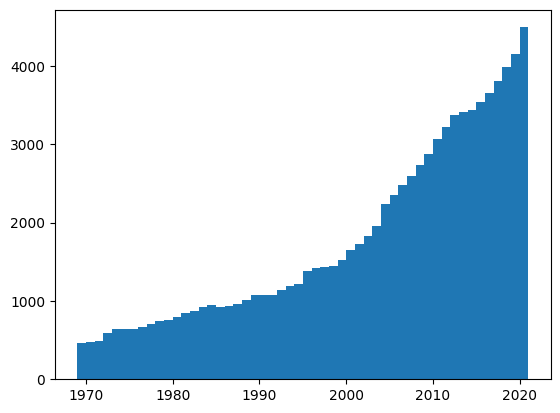

In [12]:
plotter(authors_valid.groupby("eid")["authid"].nunique())
plt.show()

plt.hist(authors_valid["year"],bins=[i for i in range(1969,2022)])

In [13]:
res = pd.DataFrame()
auth_list = [i for i in range(int(authors_valid["authid"].max()))]
auth_list = random.sample(auth_list,len(auth_list))

for i in range(5000):
  res = pd.concat([res,coauthor_works(auth_list[i])],axis="index")
res

,authid,index,year,source_authid,eid,previous_work
1,354,34547,4.0,2968,11515,9390.0
2,766,58337,30.0,2057,19445,2951.0
3,766,69710,3.0,2057,23236,19445.0
8,9540,90874,14.0,2057,30291,13635.0
1,290,24223,13.0,553,8074,3269.0
...,...,...,...,...,...,...
1,1968,31536,16.0,2418,10512,3968.0
3,2173,14779,4.0,2418,4926,3437.0
1,917,51196,4.0,2711,17065,13307.0
3,1149,15532,4.0,2711,5177,3941.0


In [14]:
res.to_pickle(result_path + "guimera.pickle")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.447748407382948
1.0
0.220143148642293


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(left, right)


(2e-05, 2)

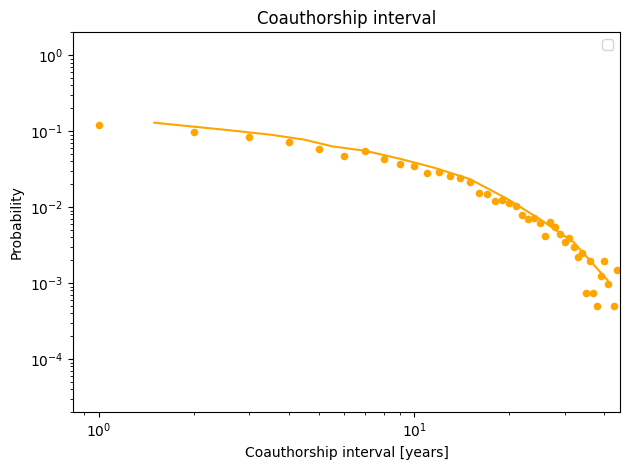

In [15]:
import powerlaw

plotter(res["year"],count="probability", c="orange")
powerlaw.plot_pdf(res[res["year"]>0]["year"], c="orange")
fit = powerlaw.Fit(res[(res["year"]>0) * (res["year"]<20)]["year"], xmin=1, discrete=True)
print(fit.alpha)
print(fit.xmin)
print(fit.D)
plt.ylim(2*10**(-5),2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:49: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


(array([10364,  6052,  3977,  2756,  1869,  1460,   998,   769,   596,
          467,   385,   331,   245,   220,   165,   132,   126,    89,
           81,    72,    71,    45,    49,    41,    41,    28,    21,
           21,    19,    23,    15,     7,     9,    11,    12,    16,
            7,    11,     9,     6,     0,     8,     6,     0,     2,
            6,     4,     2,     2,     4,     7,     3,     1,     5,
            1,     1,     4,     2,     0,     1,     1,     0,     1,
            0,     3,     1,     1,     0,     1,     2,     0,     1,
            0,     0,     1,     0,     0,     1,     1,     0,     0,
            1,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0]),
 array([  1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
         10

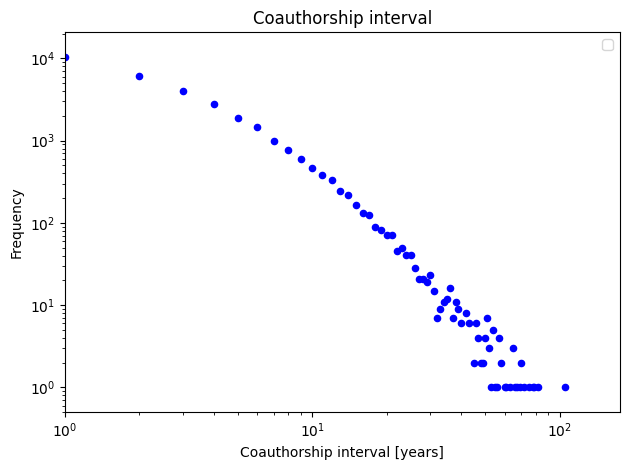

In [271]:
plotter(authors_valid.groupby("authid")["eid"].nunique(),count="number")

In [156]:
import networkx as nx
import itertools

# 例のセット
pairs = []
# セット内の全てのペアを取り出す
for c in coauth:
  pairs += list(itertools.combinations(c, 2))

G = nx.Graph()

print(len(pairs))
G.add_edges_from(pairs)

# nx.draw(G, node_size=5)

435499


In [157]:
connected_components = max(nx.connected_components(G),key=len)
len(connected_components), len(G.nodes), len(connected_components)/len(G.nodes)

(31409, 32004, 0.981408573928259)

In [159]:
coauth_history_As = pd.merge(authors_valid_As[["eid","authid"]],year_df,on="eid",how="left")
coauth_history_As.head()

,eid,authid,year
0,85015254545,57206132735,2017
1,85015254545,48861896500,2017
2,85015254545,56888819000,2017
3,85015254545,7101811799,2017
4,85015329868,7402965220,2015


In [166]:
groups = authors_valid_As[["eid","authid"]].groupby("eid")
pairs_As = []
  
for g in groups:
  pairs_As += list(itertools.combinations(g[1]["authid"].values, 2))
pairs_As[:3]

[(7005148342, 7003508994), (6701832481, 6701835921), (6701832481, 16490681300)]

In [168]:
G_As = nx.Graph()

print(len(pairs_As))
G_As.add_edges_from(pairs_As)

connected_components = max(nx.connected_components(G_As),key=len)
len(connected_components), len(G_As.nodes), len(connected_components)/len(G_As.nodes)

17851724


(559403, 610586, 0.916173970579083)

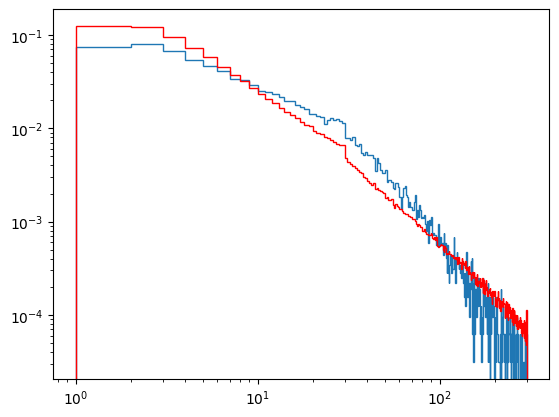

In [185]:
plt.hist([G.degree(n) for n in G.nodes()],density=True, bins=np.linspace(1,300,300),histtype="step")
plt.hist([G_As.degree(n) for n in G_As.nodes()],density=True, bins=np.linspace(1,300,300),histtype="step",color="red")

plt.yscale("log")
plt.xscale("log")